<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#My-background" data-toc-modified-id="My-background-1">My background</a></span></li><li><span><a href="#Website" data-toc-modified-id="Website-2">Website</a></span></li><li><span><a href="#Workflow" data-toc-modified-id="Workflow-3">Workflow</a></span></li><li><span><a href="#Final-Remarks" data-toc-modified-id="Final-Remarks-4">Final Remarks</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

This first post aims to summarize the setup of this blog. It may help anybody trying to make a static website using a similar structure. Jupyter notebooks are becoming a popular tool with data scientists and provides a framework that can fill the gap on the [reproducibility issues](https://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261) faced by many fields of science. There may be some [controversy](http://opiateforthemass.es/articles/why-i-dont-like-jupyter-fka-ipython-notebook/) but its features remain useful, specially when sharing code with no specialized audience or using it as a study notebook.

# My background

---

Before proceeding let's approach the background that took me to the point of creating this blog. I started learning python trying to reproduce one really nice work [[1](#cit-Deville2015)] by Sylvain Deville that used the Scopus database in order to study the evolution of the Ceramics field research. The use of [Graph Theory](https://en.wikipedia.org/wiki/Graph_theory) was a really compelling (and visually beautiful) way to present the results. However the most shocking feature: **Every tool used on the paper was completely free and open source**. Beautiful plots, reproducible work, free tools and insightful conclusions, if this is not inspiring, *nothing is...*

After such experience and ** A LOT** of visits to [Stackoverflow](https://stackoverflow.com/questions/tagged/python) I discovered the [Jupyter Notebook](http://jupyter.org/) platform. I am far from a coder and often  *~~always~~*  rely on two dumb extensive methods: 
1. Running the same piece of code over and over again with minor tweaks until getting the expected output;
2. Plotting and/or printing the values of variables and arrays.

In a ideal scenario, one would have time and learn to sketch a program after introduction to more lower level language such as C or FORTRAN. This would allow the person to better understand how a computer works while executing its code. However, with limited time resource (*and plenty of different possible ways to spend it*) such technique may suit a person starting to code.

Another useful feature of Jupyter Notebook, is the possibility of writing text in between code cells. But not only plain texts, in Jupyter we can use Markdown a minimalist syntax that allows the construction of texts with tables, images and media in a really easy way. But the best feature must be the capability of writing mathematical equations and rendering directly on the notebook. This is useful for writing remarks and study notes. Here an example:

---

Let's consider the following vector field:

\begin{equation}
V = (x^2+y^2) \ \hat{i} + (x^2-y^2) \ \hat{j}
\end{equation}

And take its divergence:

\begin{equation}
\nabla \cdot V = 2x - 2y
\end{equation}

In [151]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

len_x = 10

len_y = 10

# Variables to plot quivers

x = np.linspace(-len_x, len_x, 20)
y = np.linspace(-len_y, len_y, 20)

X, Y = np.meshgrid(x,y)

V_i = X**2-Y**2
V_j = X**2+Y**2*X

fig = plt.figure(figsize=(5,2.5))
ax = plt.subplot(111)

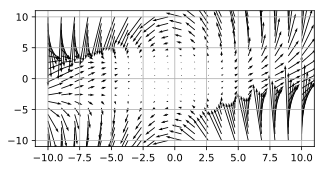

In [148]:
ax.quiver(X, Y, V_i, V_j, angles='xy', 
          scale_units='xy', scale=80)

plt.grid()
plt.show()


In [154]:
# Variables to plot colormap of divergent
x = np.linspace(-len_x, len_x, 100)
y = np.linspace(-len_y, len_y, 100)



X, Y = np.meshgrid(x,y)

div_V = 2*X+2*Y*X

fig = plt.figure(figsize=(5,2.5))
ax = plt.subplot(111)







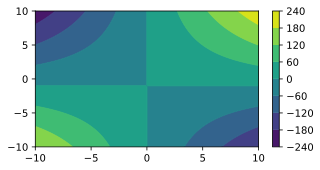

In [155]:
plot = ax.contourf(X, Y, div_V)
plt.colorbar(plot)
for c in plot.collections:
    c.set_edgecolor("face")
plt.show()

From the formal definition of the divergence,

\begin{equation}
\nabla \cdot V = \lim_{A \to 0}{\frac{1}{A} \oint_C V \cdot \hat{n} \ ds}
\end{equation}

That is to say that the divergence is the limit of the flux density of a region enclosed by the curve $C$ when this regions shrinks to a point (zero area).

We see that its quantity represents the idea of "outward flow" at a point and describes well the vector field $V$ where we can see the regions where the flux is outwards (negative divergence) and where the flux is inwards (positive divergence) a specific point.

---

After starting to know the possibilities of python, I started to progressively substitute different tools (Origin by matplotlib, Maple by SymPy, Excel by Pandas and so on) and became addicted to use coding for everything (from studying different subjects to trivial tasks such as changing the metadata of mp3 files).

Regarding writing methods about the same time that I started to code and after some texts written in Word (**and the obvious frustrations of trying to organize figures, tables, references, equations...**) I got in touch to LaTeX and started to use it for writing drafts of papers. The experience was really nice, however, for shorter projects the whole process can become cumbersome. This is were Markdown came back! It is a useful way to structure texts containing references, images, code cells and so on, thus the obvious choice for me to blogging is using these two sweet platforms, which integrates **smoothly** to other activities such as studying and researching!

# Website

---

The website was constructed following the awesome tutorial from [Dataquest](https://www.dataquest.io/blog/how-to-setup-a-data-science-blog/). In order to avoid redundancy I will not go into the details but basically the whole idea can be summerized in:

1. Creating your blog posts using a Jupyter Notebook (or Markdown for more simple text)
2. Using [Pelican](http://docs.getpelican.com/en/stable/) to convert the post into html
3. Having a GitHub repository (There are [other platforms](https://www.slant.co/options/532/alternatives/~github-alternatives) for [version control](https://help.github.com/articles/set-up-git/) but GitHub is by far the most popular, and has the bonus of providing GitHub Pages which provides the user with a website) to push your changes and easily add your posts
4. Deploying your GitHub page

Such tutorial will provides an insightful way to get used to using a version control system and a good introduction to the "html world".

However, after that you will have only a default template like the following.

![Figure 1](http://fjavieralba.com/static/images/pelican_default.png)

Figure 1: *Example of a default Pelican page. Credits to [Javier Alba](http://fjavieralba.com/pelican-a-static-blog-generator-for-pythonistas.html).*

The process to add a theme is quite simple and you will only need to specify the directory of your downloaded theme on the `pelicanconf.py` file using the `THEME`  variable. 

In order to make a little bit easier to both locally test your website and to push the changes to your GitHub pages domain, we can use two batch files to avoid opening the terminal every time to write these commands. Basically we will have such functionalities at the tip of our mouses after creating such files on any text editor.

For those using more advanced text editors, you can even bind the `.bat` file responsible to locally test your website as the buildsystem of your text editor ([SublimeText](https://www.sublimetext.com/) is a wonderful option) and you will just need to hit a "Ctrl+B" and check your changes.

# Workflow

---

The currently setup is the following.

I have a workbench directory just to be able to work on the Jupyter Notebook posts in a more direct way. Markdown pages and posts can be created directly in the repository folder.

The batch files mentioned are the following:

* `make.bat`
```bash
@echo off
pelican content -s publishconf.py
cd output
python -m pelican.server
pause
```

* `push.bat`
```bash
@echo off
pelican content -s publishconf.py
ghp-import output -b master
git push origin master
```

In `make.bat` we use the `pause` parameter in order to have the terminal open displaying the outputs while we browser on the website. This is extremely handy when debugging any problem.

After making a post I just create the `.ipynb-meta` and copy both files to the `\content\blogs` folder at the repository directory, run the test locally and if everything is all right we are just a double click away to push the post! **As simple as it gets**.

# Final Remarks

---

This is just a primer on how this whole setup was organized. There are different details that were not mentioned due the existence of plenty useful resources. 

The requirements for such setup are:
* A basic knowledge of python (For setting up the Pelican server and **obviously** to enjoy all the usability of Jupyter notebooks!);
* Understanding the basics of version control systems (They will up your coding game and when you see yourself dealing with bigger projects you will be fascinated by the rigid framework that will get your back every now and then when you face *problems*);
* The following software/packages:
 * Anaconda (one of the easiest way to have python/Jupyter);
 * git;
 * Pelican;
 * ghp-import
 
And that's all!

I would also like to thank *Sébastien Brisard* which provided useful resources and inspiration to start this project. He also has a website where he shares in a really clear way different diverse concepts ranging from image analysis to solid mechanics. You should **definitely** [check it out!](http://sbrisard.github.io/)

# References

---

[<a id="cit-Deville2015" href="#call-Deville2015">1</a>] Deville Sylvain and Stevenson Adam J., ''_Mapping Ceramics Research and Its Evolution_'', Journal of the American Ceramic Society, vol. 9, number 8, pp. 1-9,  2015.  [online](http://doi.wiley.com/10.1111/jace.13699)

